In [24]:
import pandas as pd
import os

def join():
    data_folder = f"{os.getcwd()}/../../data"
    output_file = f"{data_folder}/trips.csv"
    with open(output_file, 'wb') as output:
        for part in range(1, 15):
            with open(f"{data_folder}/parts/chicago-divvy-trips-part-{part}", 'rb') as input_file:
                print(f"Putting together {data_folder}/parts/chicago-divvy-trips-part-{part}")
                output.write(input_file.read())
    df = pd.read_csv(output_file)
    df["start_time"] = pd.to_datetime(df["start_time"], format='%Y-%m-%d %H:%M:%S')
    df.reset_index().set_index("start_time")
    return df

    

In [22]:
df = join()
df

Putting together /mnt/f/proyectos/bikes/src/graphs/../../data/parts/chicago-divvy-trips-part-1
Putting together /mnt/f/proyectos/bikes/src/graphs/../../data/parts/chicago-divvy-trips-part-2
Putting together /mnt/f/proyectos/bikes/src/graphs/../../data/parts/chicago-divvy-trips-part-3
Putting together /mnt/f/proyectos/bikes/src/graphs/../../data/parts/chicago-divvy-trips-part-4
Putting together /mnt/f/proyectos/bikes/src/graphs/../../data/parts/chicago-divvy-trips-part-5
Putting together /mnt/f/proyectos/bikes/src/graphs/../../data/parts/chicago-divvy-trips-part-6
Putting together /mnt/f/proyectos/bikes/src/graphs/../../data/parts/chicago-divvy-trips-part-7
Putting together /mnt/f/proyectos/bikes/src/graphs/../../data/parts/chicago-divvy-trips-part-8
Putting together /mnt/f/proyectos/bikes/src/graphs/../../data/parts/chicago-divvy-trips-part-9
Putting together /mnt/f/proyectos/bikes/src/graphs/../../data/parts/chicago-divvy-trips-part-10
Putting together /mnt/f/proyectos/bikes/src/graph

,start_time,from_station_id,quantity
0,2019-05-21 14:00:00,1,1
1,2015-05-08 12:00:00,2,7
2,2015-05-08 13:00:00,2,0
3,2015-05-08 14:00:00,2,1
4,2015-05-08 15:00:00,2,2
...,...,...,...
26328980,2019-12-31 13:00:00,673,0
26328981,2019-12-31 14:00:00,673,0
26328982,2019-12-31 15:00:00,673,0
26328983,2019-12-31 16:00:00,673,0


<AxesSubplot:>

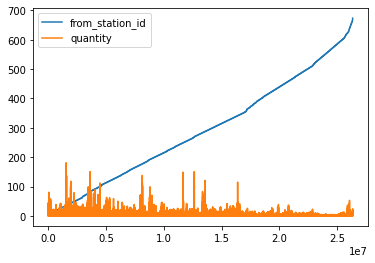

In [23]:


df_c = df.copy()
df_c = df_c.drop(columns=["from_station_id"])

INTERVAL = "1H" # It could be also 15Min
df_c = df_c.groupby('from_station_id').resample(INTERVAL, on='start_time') \
        .size() \
        .to_frame() \
        .rename(columns={0: "quantity"}) \
        .reset_index() \
        .set_index("start_time")
df_c
